<a href="https://colab.research.google.com/github/jenishaprincess/DR/blob/main/DR_50_70_MblNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from tensorflow.keras import layers
import torch
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50_70/Train_70'
test_dir = '/content/drive/MyDrive/DR_50_70/Test_70'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
model = MobileNet(weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [7]:
def extract_features_Mobilenet(img_path):
    img = image.load_img(img_path, target_size=(300, 300))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [8]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Mobilenet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 24ms/step


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Mobilenet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 19ms/step


Training Bernoulli Naive Bayes...
True Positives: 454
True Negatives: 2479
False Positives: 221
False Negatives: 221
Accuracy: 0.869037037037037
Precision: 0.691859003050324
Specificity: 0.9181481481481482
Sensitivity: 0.6725925925925925
F1 Score: 0.6755272830745411
Recall: 0.6725925925925925



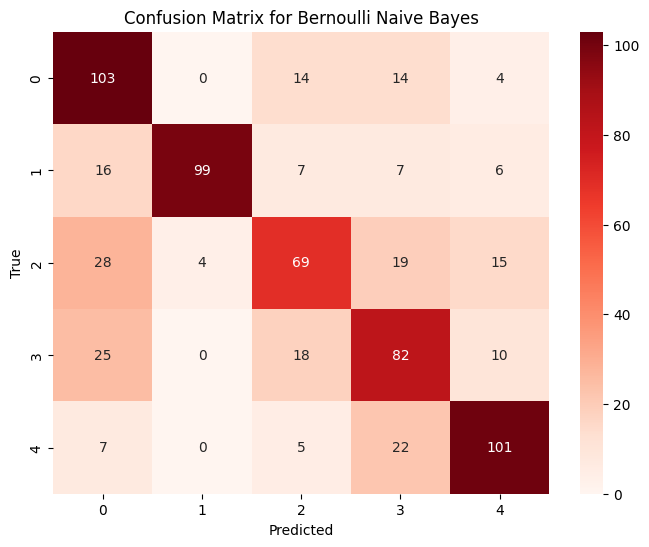

Training Multinomial Naive Bayes...
True Positives: 466
True Negatives: 2491
False Positives: 209
False Negatives: 209
Accuracy: 0.8761481481481481
Precision: 0.7119981901181397
Specificity: 0.9225925925925926
Sensitivity: 0.6903703703703703
F1 Score: 0.6928811665533218
Recall: 0.6903703703703703



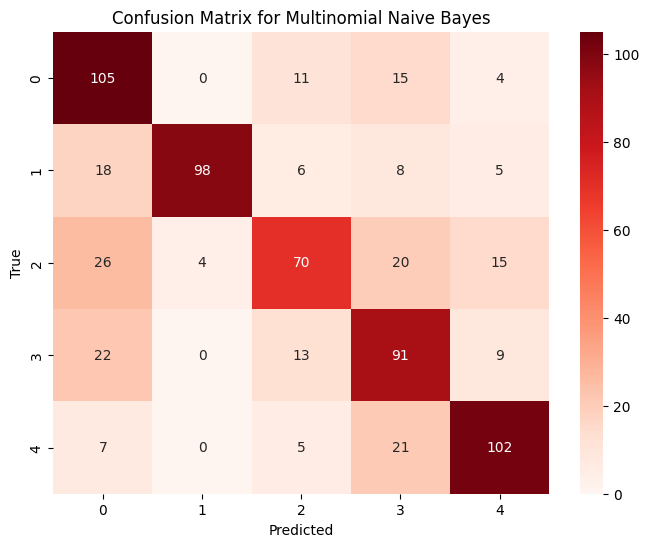

Training Complement Naive Bayes...
True Positives: 468
True Negatives: 2493
False Positives: 207
False Negatives: 207
Accuracy: 0.8773333333333333
Precision: 0.7358792181070835
Specificity: 0.9233333333333333
Sensitivity: 0.6933333333333334
F1 Score: 0.6855049056965583
Recall: 0.6933333333333334



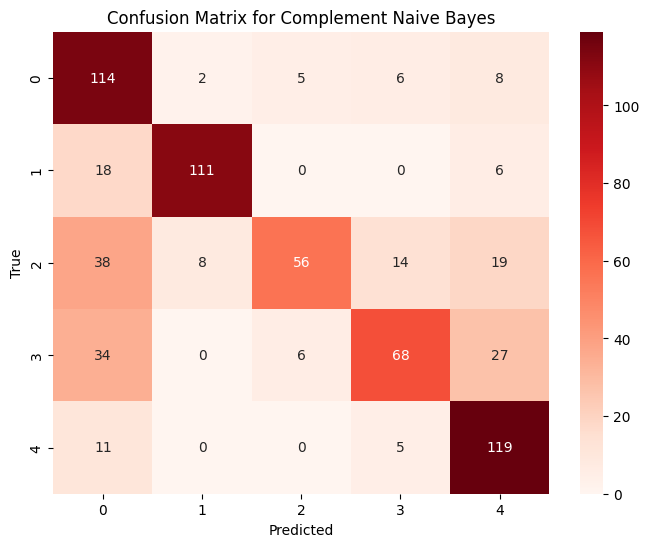

Training Gaussian Naive Bayes...
True Positives: 535
True Negatives: 2560
False Positives: 140
False Negatives: 140
Accuracy: 0.917037037037037
Precision: 0.8024323544768617
Specificity: 0.9481481481481482
Sensitivity: 0.7925925925925926
F1 Score: 0.7906523523875334
Recall: 0.7925925925925926



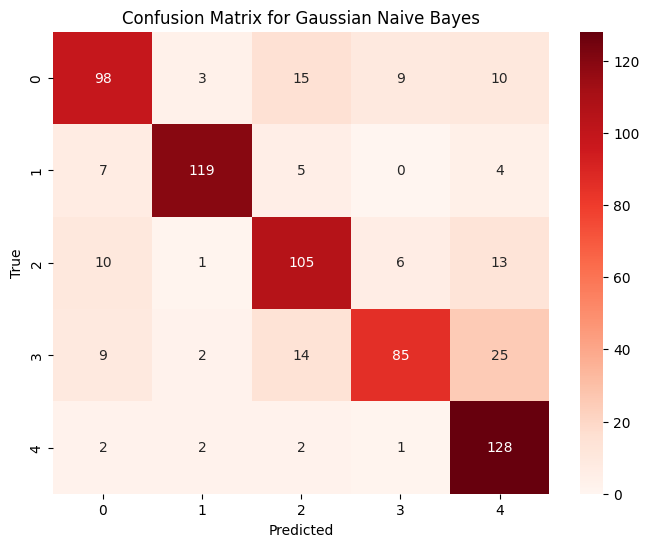

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of classifiers to try
classifiers = [BernoulliNB, MultinomialNB, ComplementNB, GaussianNB]
classifier_names = ['Bernoulli Naive Bayes', 'Multinomial Naive Bayes', 'Complement Naive Bayes', 'Gaussian Naive Bayes']

for clf, name in zip(classifiers, classifier_names):
    print(f"\033[1mTraining {name}...\033[0m")

    # Train classifier
    model = clf()
    model.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = model.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()